In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
amd = pd.read_csv(r'C:\Users\vinem\OneDrive\Рабочий стол\AMD (1980-2023).csv')
nvidia = pd.read_csv(r'C:\Users\vinem\OneDrive\Рабочий стол\NVIDIA (1999-2023).csv')
intel = pd.read_csv(r'C:\Users\vinem\OneDrive\Рабочий стол\Intel (1980-2023).csv')
amd.shape, nvidia.shape, intel.shape

((10859, 7), (6094, 7), (10859, 7))

In [3]:
#Open - Open stock market price
#High - Highest stock market price
#Low - Lowest stock market price
#Close - Close stock market price
#Adj Close - Adjusted Close stock market price
#Volume - The total quantity of shares or contracts traded for a specified security

In [4]:
amd.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-18,0.0,3.125000,2.937500,3.031250,3.031250,727200
1,1980-03-19,0.0,3.083333,3.020833,3.041667,3.041667,295200
2,1980-03-20,0.0,3.062500,3.010417,3.010417,3.010417,159600
3,1980-03-21,0.0,3.020833,2.906250,2.916667,2.916667,130800
4,1980-03-24,0.0,2.916667,2.635417,2.666667,2.666667,436800


In [5]:
nvidia.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-25,0.442708,0.458333,0.410156,0.453125,0.415786,51048000
1,1999-01-26,0.458333,0.467448,0.411458,0.417969,0.383527,34320000
2,1999-01-27,0.419271,0.429688,0.395833,0.416667,0.382332,24436800
3,1999-01-28,0.416667,0.419271,0.412760,0.415365,0.381137,22752000
4,1999-01-29,0.415365,0.416667,0.395833,0.395833,0.363215,24403200


I will connect the last three columns of each table

In [6]:
df = pd.merge(amd.iloc[:, [0, 5]], nvidia.iloc[:, [0, 5]], on= 'Date')
df = pd.merge(df, intel.iloc[:, [0, 5]], on= 'Date')
df.columns = ['Date', 'AMD_Agi', 'NVIDIA_Agi', 'INTEL_Agi']
df.head()

,Date,AMD_Agi,NVIDIA_Agi,INTEL_Agi
0,1999-01-25,10.71875,0.415786,18.973511
1,1999-01-26,11.00000,0.383527,19.890415
2,1999-01-27,10.62500,0.382332,19.282166
3,1999-01-28,11.43750,0.381137,19.926727
4,1999-01-29,11.46875,0.363215,20.471422


In [7]:
df.shape

(6094, 4)

In [8]:
import datetime

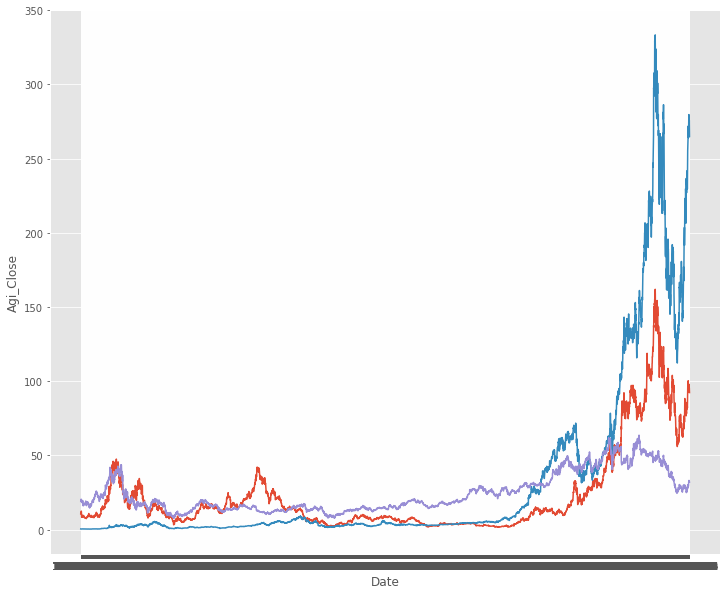

In [9]:
plt.figure(figsize = (12, 10))
plt.plot(df['Date'], df['AMD_Agi'], label = 'AMD')
plt.plot(df['Date'], df['NVIDIA_Agi'], label = 'NVIDIA')
plt.plot(df['Date'], df['INTEL_Agi'], label = 'INTEL')

plt.xlabel('Date')
plt.ylabel('Agi_Close')
plt.show()

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
filtered = df[df['Date'].isin(pd.date_range('2019-01-01', '2023-01-01'))]
filtered

,Date,AMD_Agi,NVIDIA_Agi,INTEL_Agi
5017,2019-01-02,18.830000,33.799728,41.513222
5018,2019-01-03,17.049999,31.757652,39.229473
5019,2019-01-04,19.000000,33.792282,41.636673
5020,2019-01-07,20.570000,35.581276,41.830654
5021,2019-01-08,20.750000,34.695469,42.095184
...,...,...,...,...
6020,2022-12-23,64.519997,152.034180,25.775923
6021,2022-12-27,63.270000,141.186020,25.627729
6022,2022-12-28,62.570000,140.336166,25.232544
6023,2022-12-29,64.820000,146.005203,25.894478


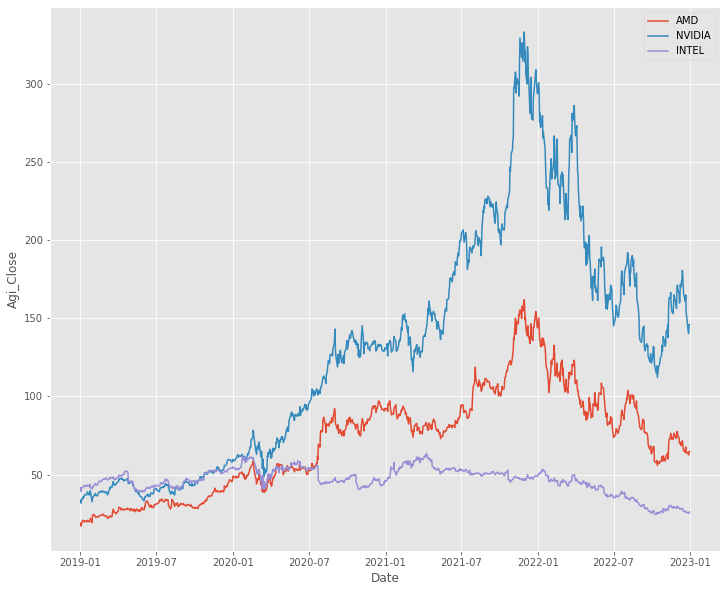

In [11]:
plt.figure(figsize = (12, 10))
plt.plot(filtered['Date'], filtered['AMD_Agi'], label = 'AMD')
plt.plot(filtered['Date'], filtered['NVIDIA_Agi'], label = 'NVIDIA')
plt.plot(filtered['Date'], filtered['INTEL_Agi'], label = 'INTEL')

plt.xlabel('Date')
plt.ylabel('Agi_Close')
plt.legend()
plt.show()

The graph shows that NVIDIA surged ahead from 2020, and does not lower the bar even now, AMD is at the average level, although in 2019 was below all (listed on the chart), both AMD and NVIDIA had leaps and bounds in 2022, now Intel, in 2019 it was ahead of all, but at the end of the year began to lose ground, and also in subsequent years, to his rivals in no way can not reach

Now let's look at the prices (low and high) at each of the companies represented

In [12]:
amd['Date'] = pd.to_datetime(amd['Date'], format = '%Y-%m-%d')
amd_df = amd[amd['Date'].isin(pd.date_range('2019-01-01', '2023-01-01'))]

nvidia['Date'] = pd.to_datetime(nvidia['Date'], format = '%Y-%m-%d')
nvidia_df = nvidia[nvidia['Date'].isin(pd.date_range('2019-01-01', '2023-01-01'))]

intel['Date'] = pd.to_datetime(intel['Date'], format = '%Y-%m-%d')
intel_df = intel[intel['Date'].isin(pd.date_range('2019-01-01', '2023-01-01'))]

In [13]:
def plot(data, name):
    fig, ax1 = plt.subplots(figsize=(15, 5))
    
    ax2 = ax1.twinx()
    ax1.bar(x = data.Date, height = data.Volume, color = 'blue')
    ax2.plot(data.Date, data['Low'], 'r')
    ax2.plot(data.Date, data['High'], 'g')
    
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.title(f'Volume and Price {name}')
    plt.show()
    
#This code is taken from one of the members of the kaggle

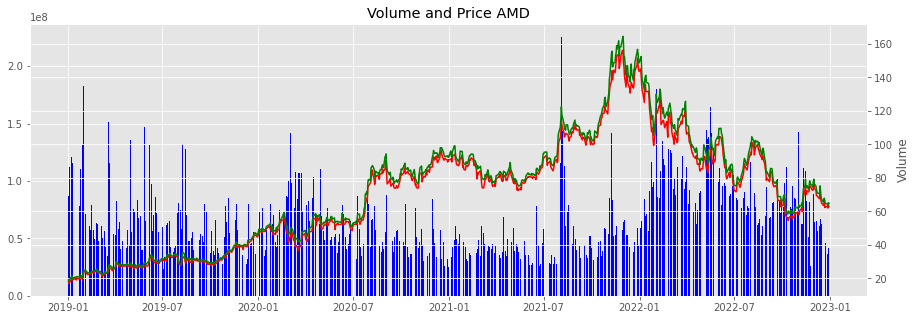

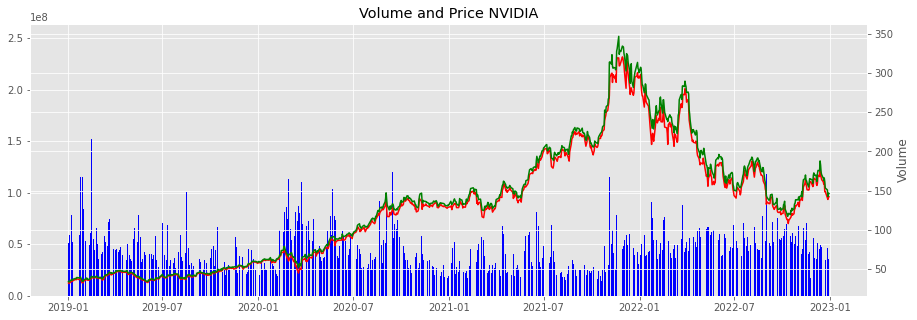

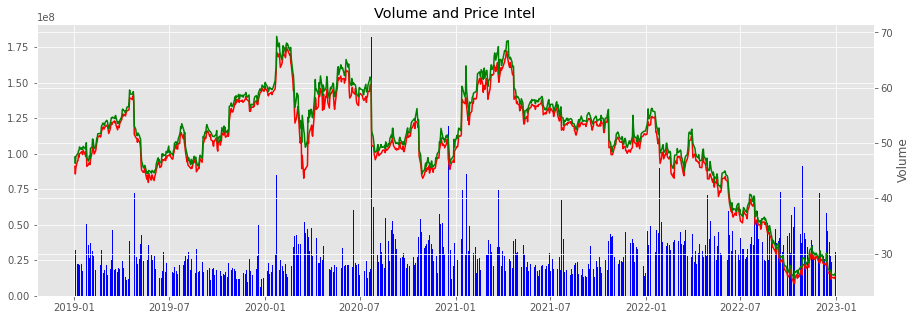

In [14]:
plot(amd_df, 'AMD')
plot(nvidia_df, 'NVIDIA')
plot(intel_df, 'Intel')

NVIDIA and AMD's stock price was growing, and its peak was in 2022, after they fell slightly, AMD is rapidly falling, but NVIDIA, although falling, but it has small rises, what about Intel, its shares until half of 2021 remained stable, but after rapidly began to fall, even compared with 2019 shares in 2023 lower